In [1]:
theta1 = [0.31, 0.18, 0.65, 0.25, 5]  # true values
theta_n1 = [0.372, 0.216, 0.78, 0.3, 6.0] # nominal values +20%
theta_min1 = [0.155, 0.09, 0.325, 0.125, 2.5]   # minimum values -50%
theta_max1 = [0.465, 0.27, 0.975, 0.375, 7.5]  # maximum values +50%
theta_maxs1 = [hi / nom for hi, nom in zip(theta_max1, theta_n1)]
theta_mins1 = [lo / nom for lo, nom in zip(theta_min1, theta_n1)]

In [2]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'u1': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'rel',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 0.2,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.05,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 0.01,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
        'u2': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'dec',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 35,  # Maximum allowable signal level, des_opt space upper bound
            'min': 5,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 5,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'y10': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
        'y20': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [0, 10],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 0.02,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 0.5
}

In [3]:
models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/poster/case 2/model.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n1
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs1
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins1
    }
}

In [4]:
des_opt = { # Design settings for the experiment
    'eps': 1e-4, #perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    'meth': 'L',  # optimisation method, 'G': Global Differential Evolution, 'L': Local Pattern Search, 'GL': Global Differential Evolution refined with Local Pattern Search
    'md_ob': 'BFF',     # MD optimality criterion, 'HR': Hunter and Reiner, 'BFF': Buzzi-Ferraris and Forzatti
    'pp_ob': 'E',  # PP optimality criterion, 'D', 'A', 'E', 'ME'
    'plt': True,  # Plot the results
    'itr': {
        'pps': 30, # population size
        'maxmd': 60, # maximum number of MD runs
        'tolmd': 1, # tolerance for MD optimization
        'maxpp':20 ,# maximum number of PP runs
        'tolpp': 1, # tolerance for PP optimization
    }
}

In [5]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=1, num_parallel_runs=16)

In [5]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'M', # selected true models (with nominal values)
    'theta': theta1,
    'errt': 'rel',  # error type, 'rel' for relative error, 'abs' for absolute error
    'prels': { # classic des_opt settings, sheet name is the round run name, each sheet contains the data for the round, iso space.
    }
}

In [7]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=1, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/poster/case 2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2      MES_Y:y2      MES_E:y2  \
 0        0.00  6.341152  0.319383      0.00  7.802620e+00  4.024440e-01   
 1        3.56  1.876800  0.088124      3.56  2.105559e-13  1.052023e-14   
 2        4.64  1.081204  0.054962      4.64  0.000000e+00  3.133913e-15   
 3        7.34  0.317260  0.016656      7.34  1.540576e-12  7.577920e-14   
 4        9.50  0.139292  0.006321      9.50  4.338782e-11  2.280022e-12   
 ..        ...       ...       ...       ...           ...           ...   
 496       NaN       NaN       NaN       NaN           NaN           NaN   
 497       NaN       NaN       NaN       NaN           NaN           NaN   
 498       NaN       NaN       NaN       NaN           NaN           NaN   
 499       NaN       NaN       NaN       NaN           NaN           NaN   
 500       NaN       NaN       NaN       NaN           NaN           NaN   


In [6]:
from middoe.log_utils import  read_excel
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [7]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'SQP',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-4,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [8]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.0690 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0627 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0611 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0594 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0665 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0611 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0617 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0665 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0700 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0655 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0617 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0679 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0611 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0564 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0590 seconds.
Objective function: 'WLS'| model 'M' | C

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'M' | CPU time 0.0680 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0622 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0643 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0685 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0697 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0656 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0671 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0642 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0695 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0662 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0622 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0620 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0668 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0642 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0631 seconds.
Objective function: 'WLS'| model 'M' | C

In [10]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

Estimated parameters of M: [0.3528264366093005, 0.18033296478485514, 0.680418628766513, 0.24332509151728116, 4.644470998803176]
LS objective function value for M: 0.07119361684637181
T-values of model M: [0.16247029 0.00156212 0.0267585  0.07254718 0.01110364]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9996
  y2: 0.9988


Estimability analysis for round 1 is running
Parameter ranking from most estimable to least estimable for M in round 1: [1, 2, 4, 0, 3]
J_theta : 27.444594803123703
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 103.95405087719847
rC 1 parameters: 19.12736401851869
rCKub parameters: 18.12736401851869
rCC parameters: 5.70912133950623
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 101.61885117552167
rC 2 parameters: 24.724752124132653
rCKub parameters: 23.724752124132653
rCC parameters: 5.681188031033163
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 26.63329301717685
rC 3 parameters: -0.4056508929734264
rCKub parameters: -0.2028254464867132
rCC parameters: -0.20047090774778553
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 26.833076320603418
rC 4 parameters: -0.6115184825202853
rCKub parameters: -0.40767898834685684
rCC parameters: -0.11730658236223807


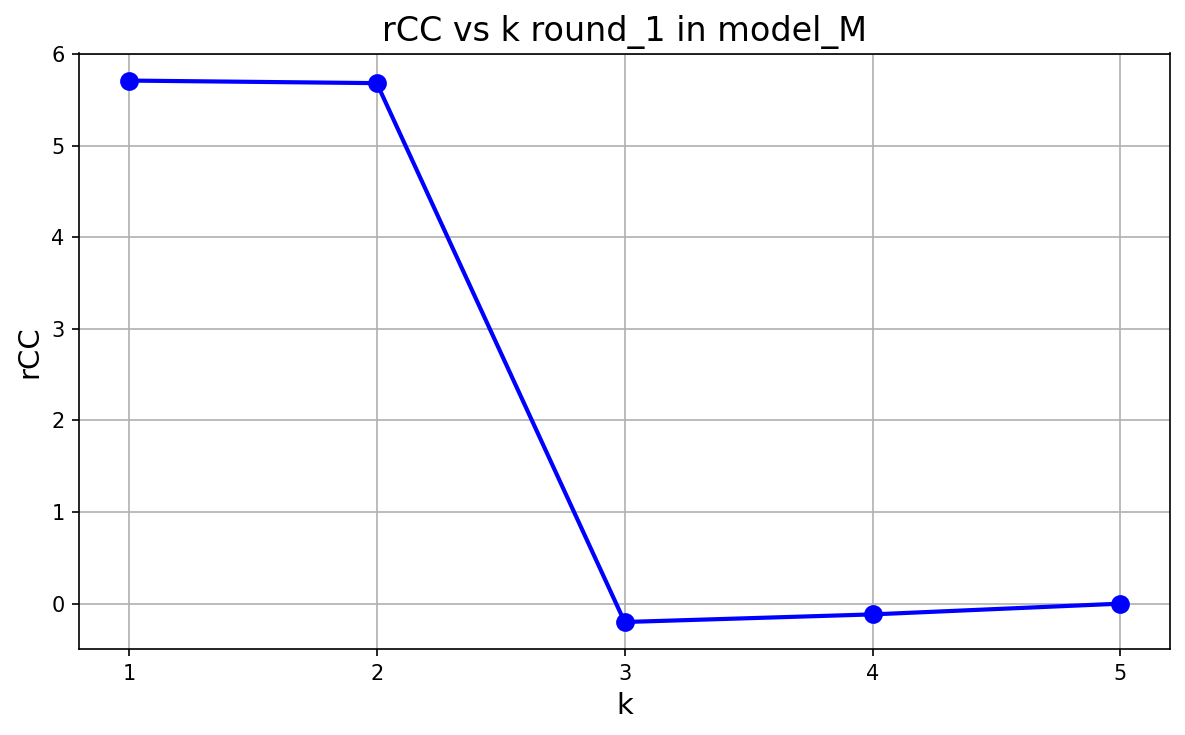

Optimal number of parameters to estimate for M: 3


In [10]:
from middoe.sc_estima import estima
j = 1
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


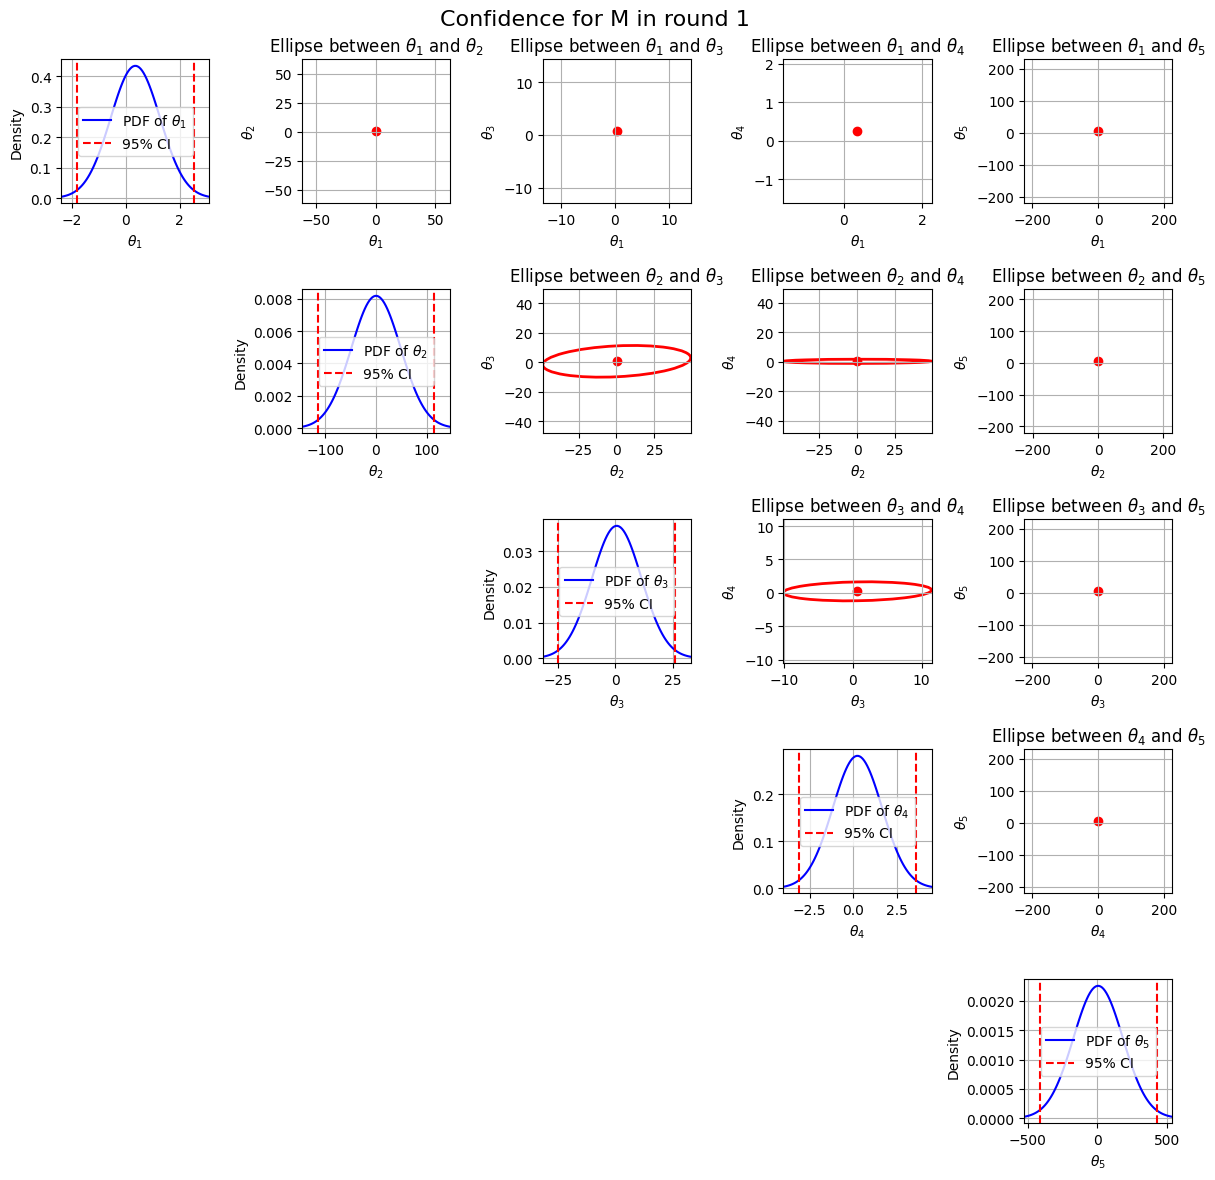

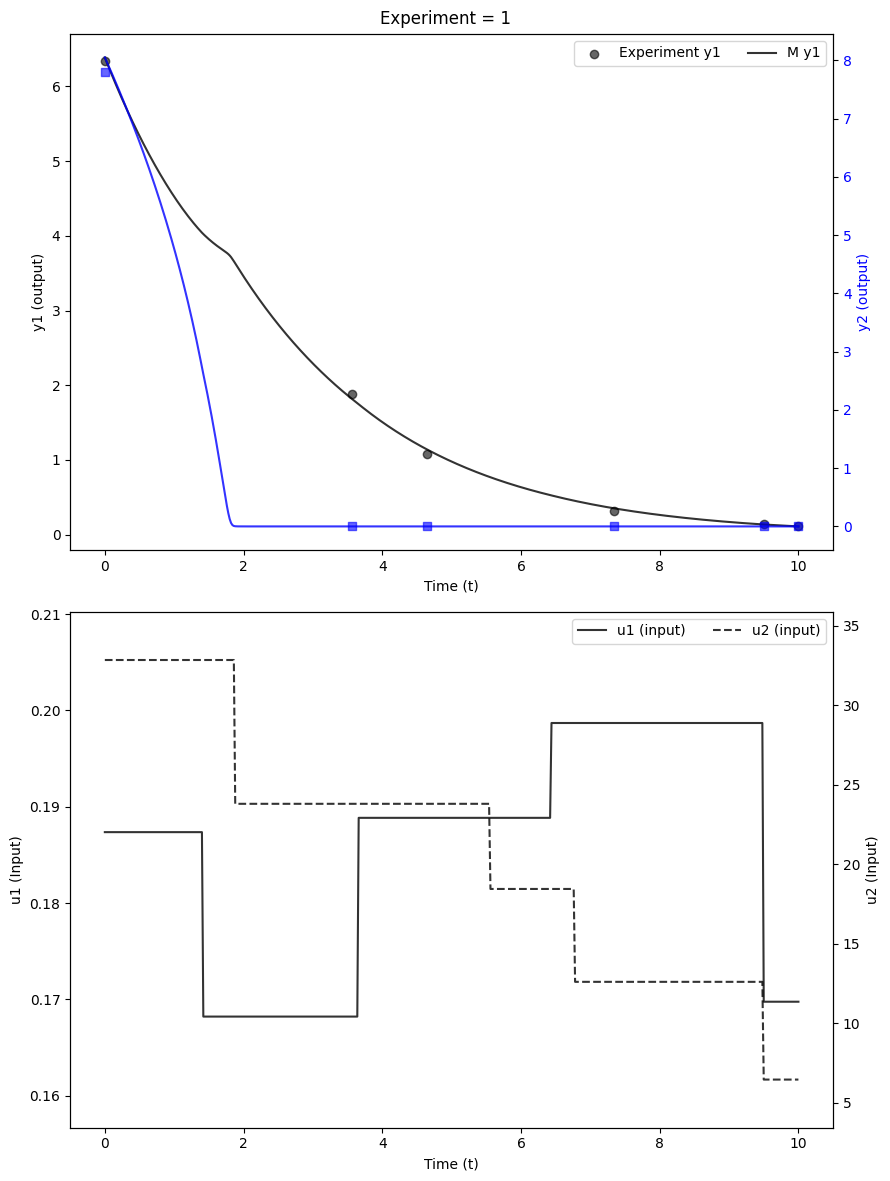

reference t value for model M and round 1: 2.3646242515927844
estimated t values for model M and round 1: [0.16247029 0.00156212 0.0267585  0.07254718 0.01110364]
P-value for model M and round 1: 100.0
eps for model M and round 1: 0.0001



{'M': np.float64(2.3646242515927844)}

In [11]:
from middoe.log_utils import  save_rounds
round_data={}
round = 1
save_rounds(round, resultun, 'preliminary', round_data, models,iden_opt, obs, data, system)

In [14]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=2, num_parallel_runs=16)

In [15]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=2, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/poster/case 2/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  X:all  \
 0        0.00  6.407055  0.336947      0.00  8.043960  0.393684   0.00   
 1        1.40  4.974326  0.244499      1.40  6.993717  0.333148   0.02   
 2        2.72  3.481611  0.184137      2.72  5.943037  0.295361   0.04   
 3        3.44  3.223524  0.157640      3.44  6.239221  0.280266   0.06   
 4        4.10  2.521777  0.135984      4.10  5.144325  0.264407   0.08   
 ..        ...       ...       ...       ...       ...       ...    ...   
 496       NaN       NaN       NaN       NaN       NaN       NaN   9.92   
 497       NaN       NaN       NaN       NaN       NaN       NaN   9.94   
 498       NaN       NaN       NaN       NaN       NaN       NaN   9.96   
 499       NaN       NaN       NaN       NaN       NaN       NaN   9.98   
 500       NaN       NaN       NaN       NaN       NaN       NaN  10.00   
 
          

In [19]:
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [20]:
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.1682 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1757 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1878 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1880 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1740 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1690 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1534 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1488 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1764 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1740 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1581 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1461 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1622 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1535 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1640 seconds.
Objective function: 'WLS'| model 'M' | C

In [21]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
obs = uncert_results['obs']

Estimated parameters of M: [0.33408530144299553, 0.18037984234657944, 0.6884035852943797, 0.24258902425903867, 4.740555103014873]
LS objective function value for M: 2.0524598722969047
T-values of model M: [12.58357634  2.44620138 10.82639221 21.76422149 31.858299  ]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9862
  y2: 0.9954


Estimability analysis for round 2 is running
Parameter ranking from most estimable to least estimable for M in round 2: [1, 0, 4, 2, 3]
J_theta : 315.8561997693044
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 828.3428829741338
rC 1 parameters: 128.12167080120736
rCKub parameters: 127.12167080120736
rCC parameters: 21.020278466867893
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 541.4206482115517
rC 2 parameters: 75.18814948074909
rCKub parameters: 74.18814948074909
rCC parameters: 9.148518685093636
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 359.762361565029
rC 3 parameters: 21.953080897862293
rCKub parameters: 20.953080897862293
rCC parameters: 1.6627567414885243
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 393.54940189892443
rC 4 parameters: 77.69320212962003
rCKub parameters: 76.69320212962003
rCC parameters: 3.1538834220675014


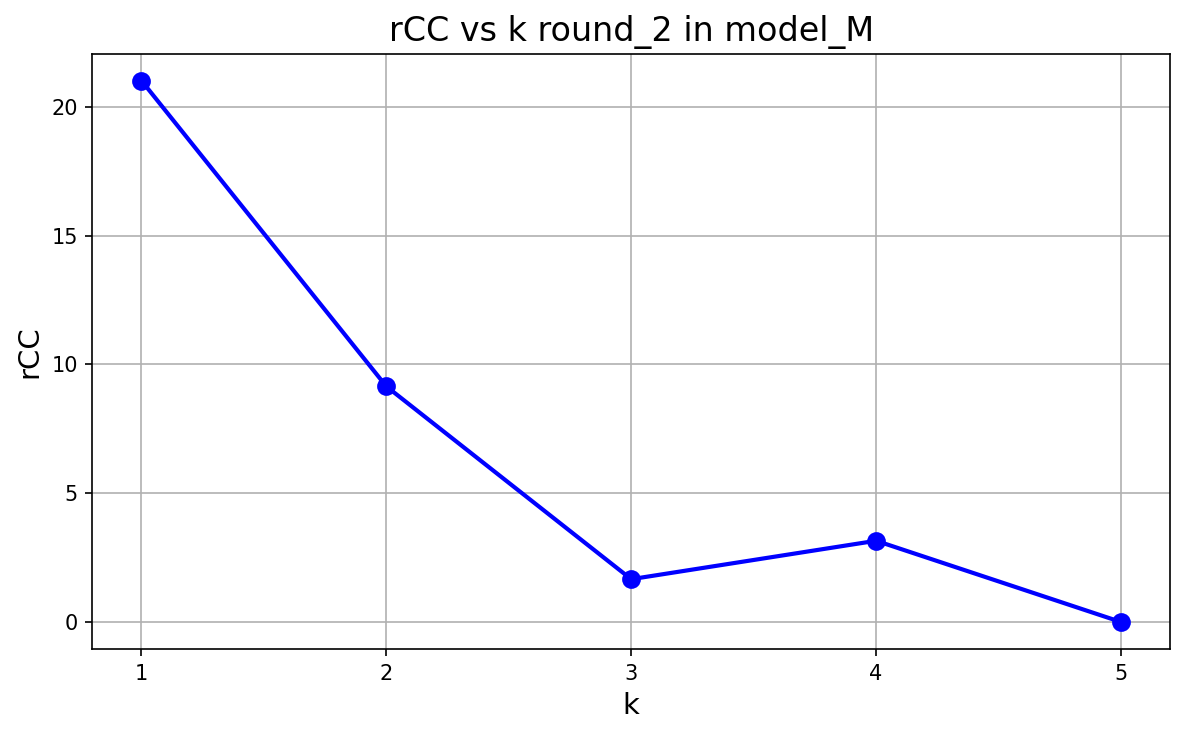

Optimal number of parameters to estimate for M: 5


In [18]:
j = 2
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


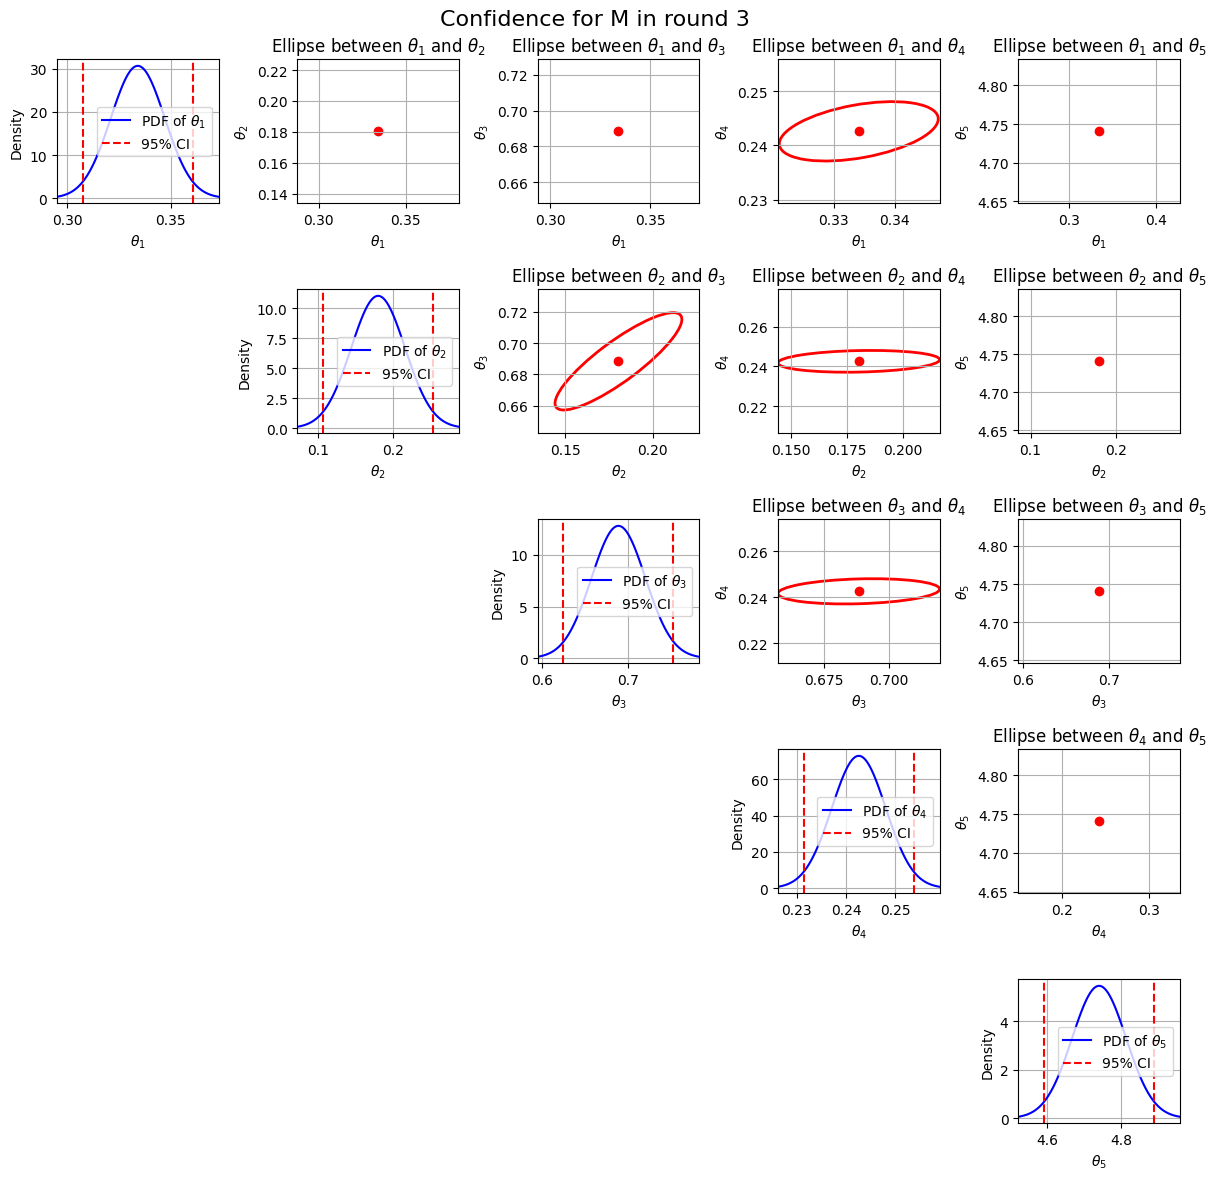

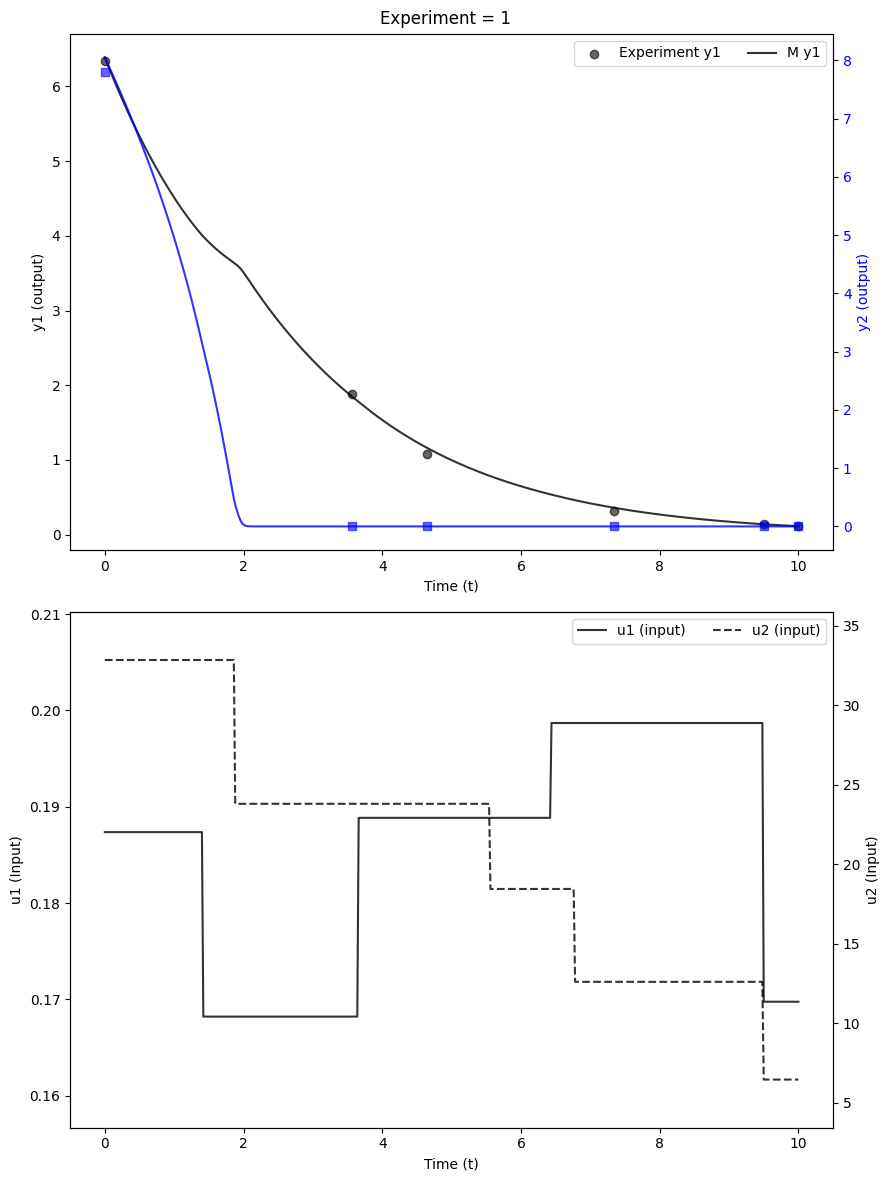

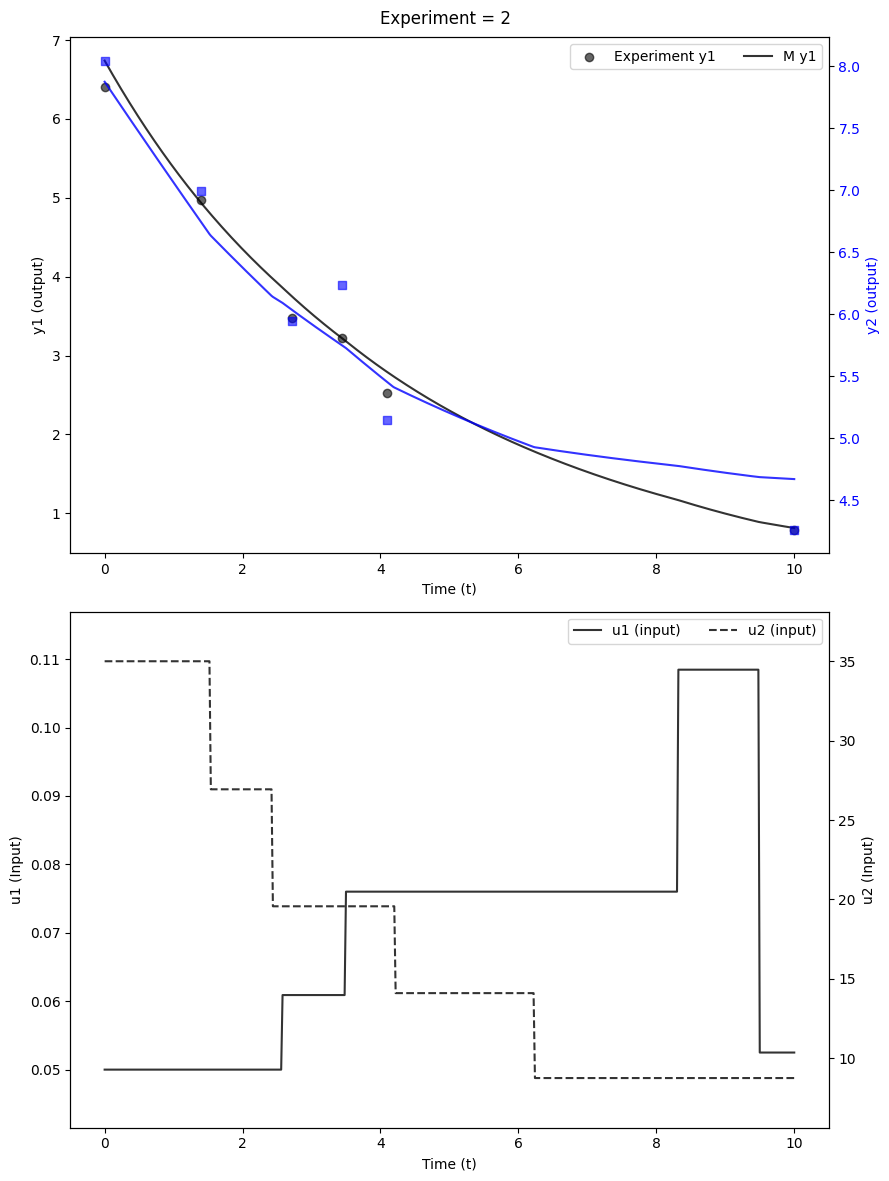

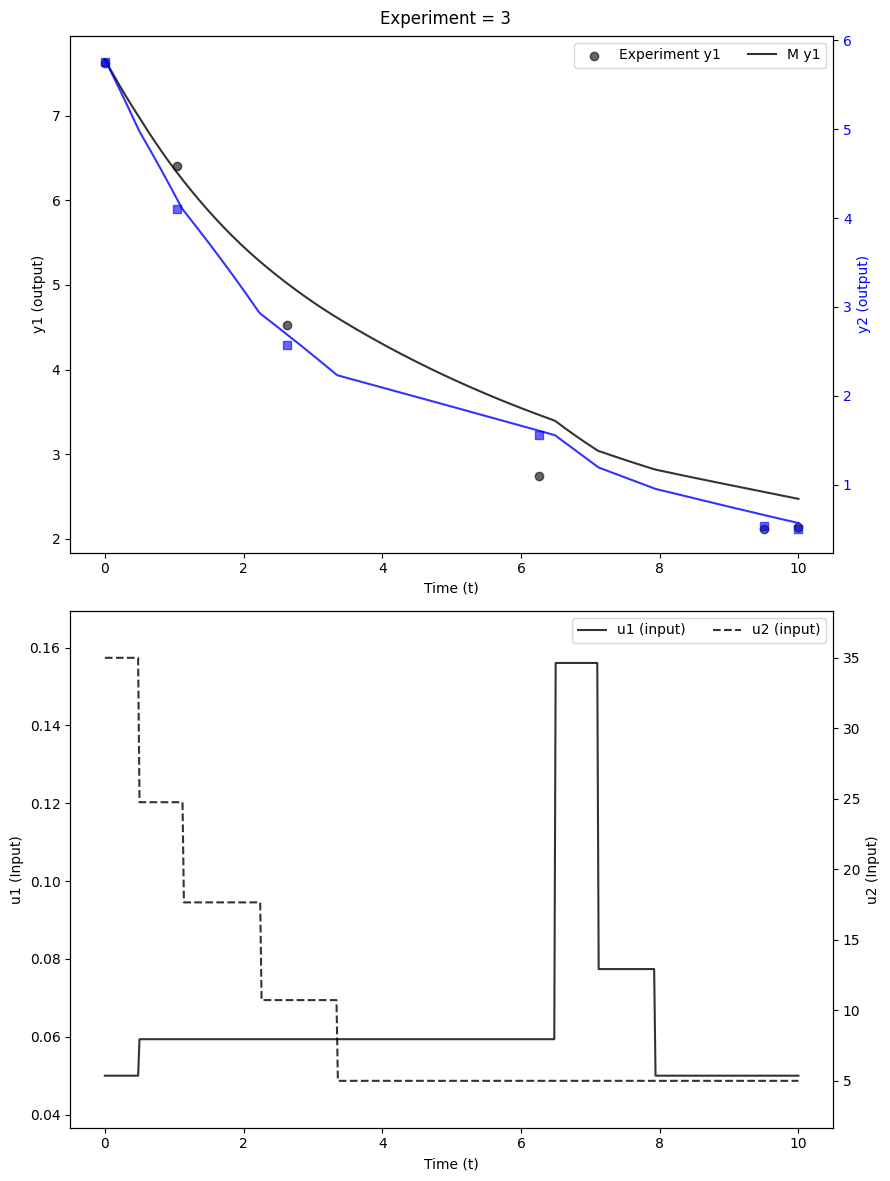

reference t value for model M and round 3: 2.0395134463964077
estimated t values for model M and round 3: [12.58357634  2.44620138 10.82639221 21.76422149 31.858299  ]
P-value for model M and round 3: 100.0
eps for model M and round 3: 0.0001



{'M': np.float64(2.0395134463964077)}

In [22]:
round = 3
save_rounds(round, resultun, 'preliminary', round_data, models,iden_opt, obs, data, system)

In [23]:
from middoe.log_utils import save_to_jac
save_to_jac(round_data, purpose="iden")

[INFO] Results saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\iden_results.jac


INFO:middoe.iden_utils:Starting pcomp_plot.


Loaded: iden_results.jac
File not found: sensa_results.jac


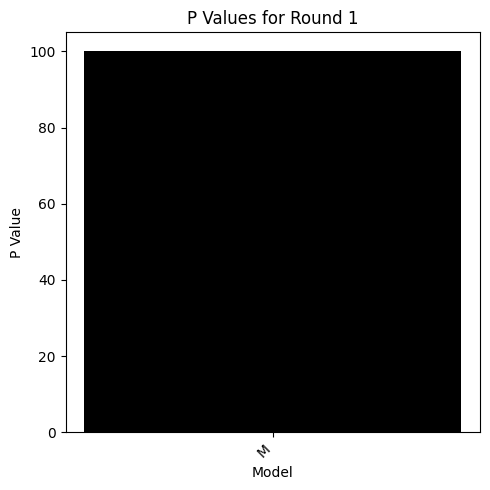

INFO:middoe.iden_utils:P values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\p_values_round_1.png.


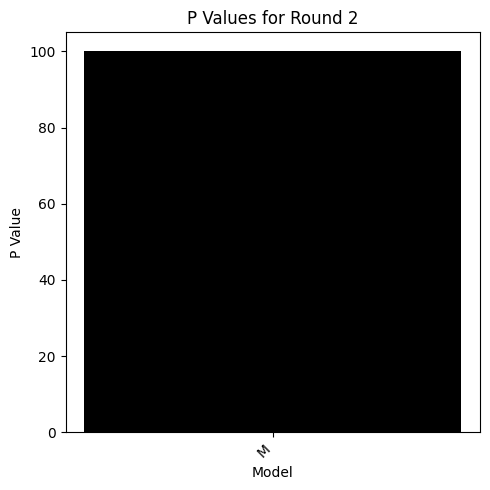

INFO:middoe.iden_utils:P values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\p_values_round_2.png.


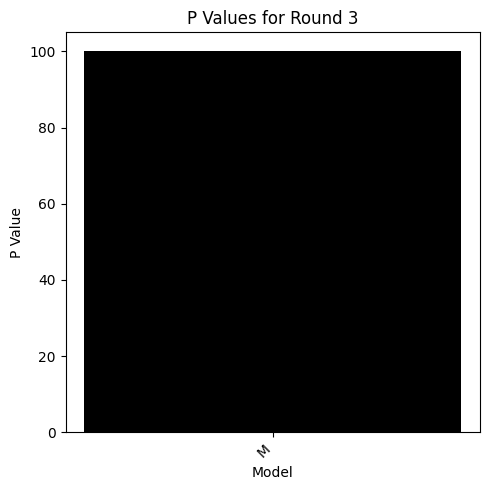

INFO:middoe.iden_utils:P values plot for Round 3 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\p_values_round_3.png.
INFO:middoe.iden_utils:Starting tcomp_plot.


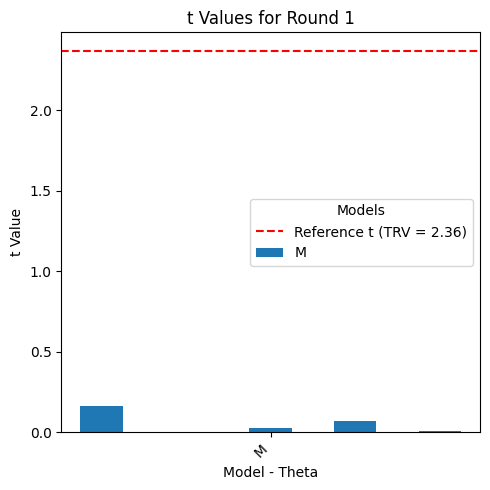

INFO:middoe.iden_utils:T values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\t_values_round_1.png.


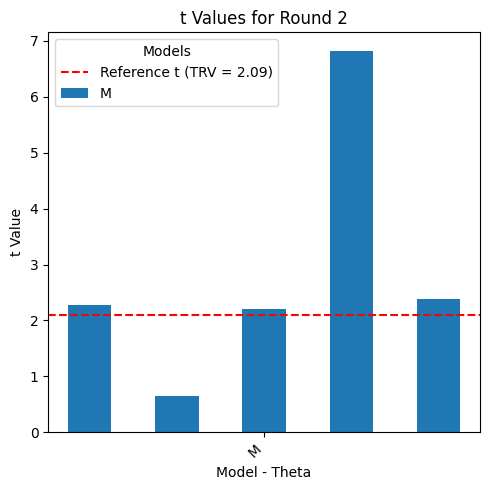

INFO:middoe.iden_utils:T values plot for Round 2 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\t_values_round_2.png.


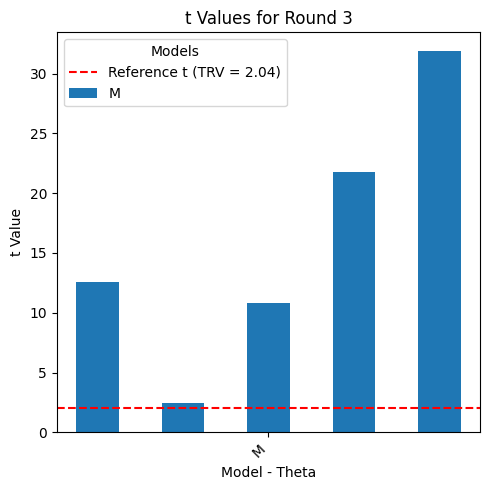

INFO:middoe.iden_utils:T values plot for Round 3 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\t_values_round_3.png.


Post-processing model: M


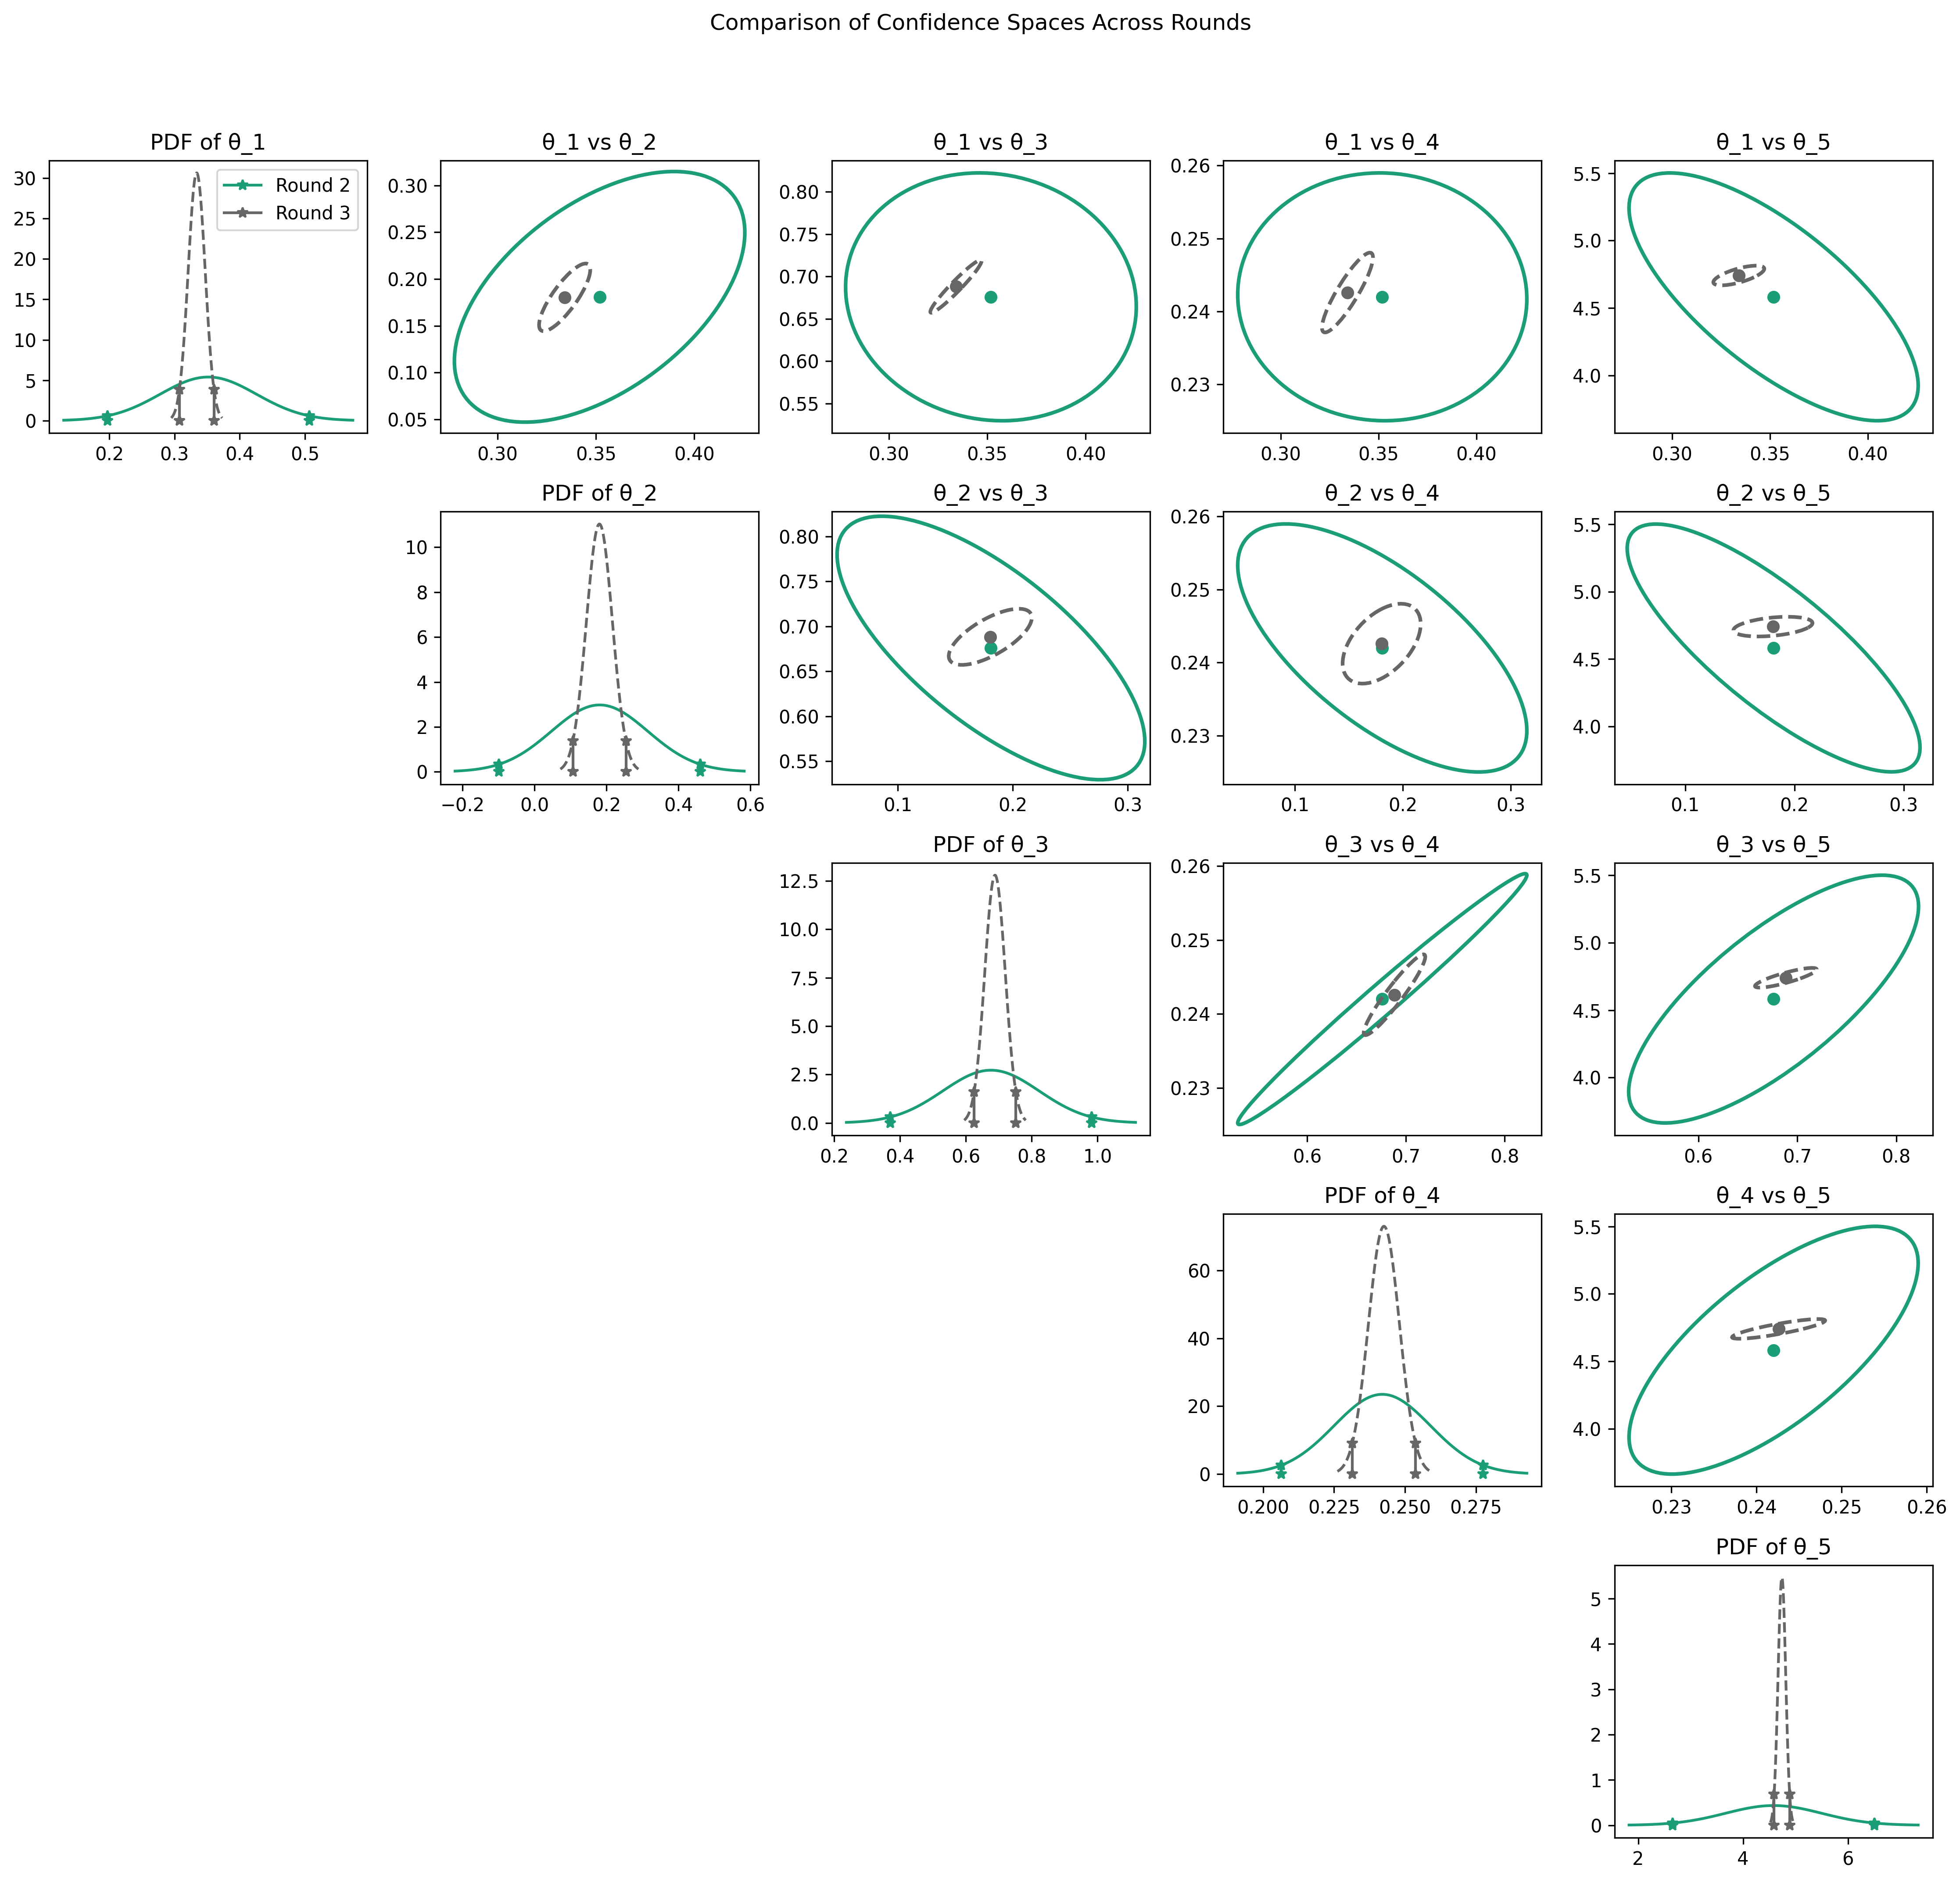

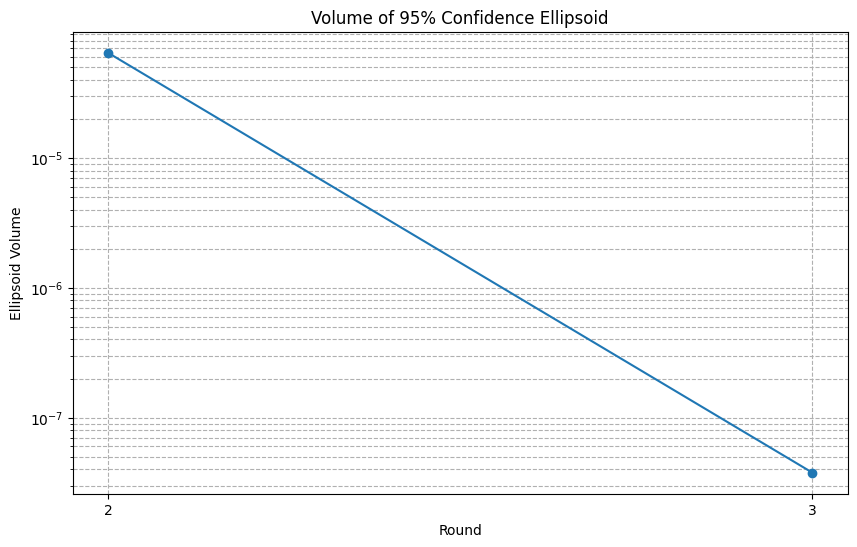

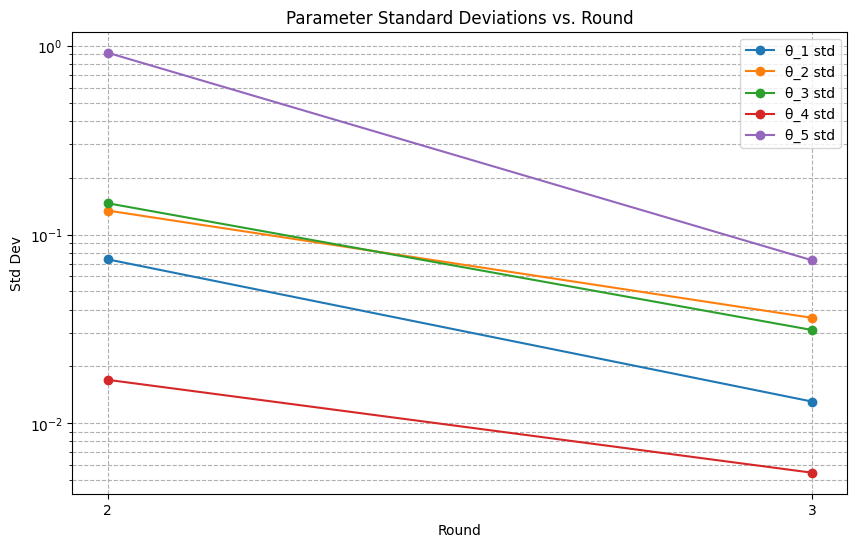

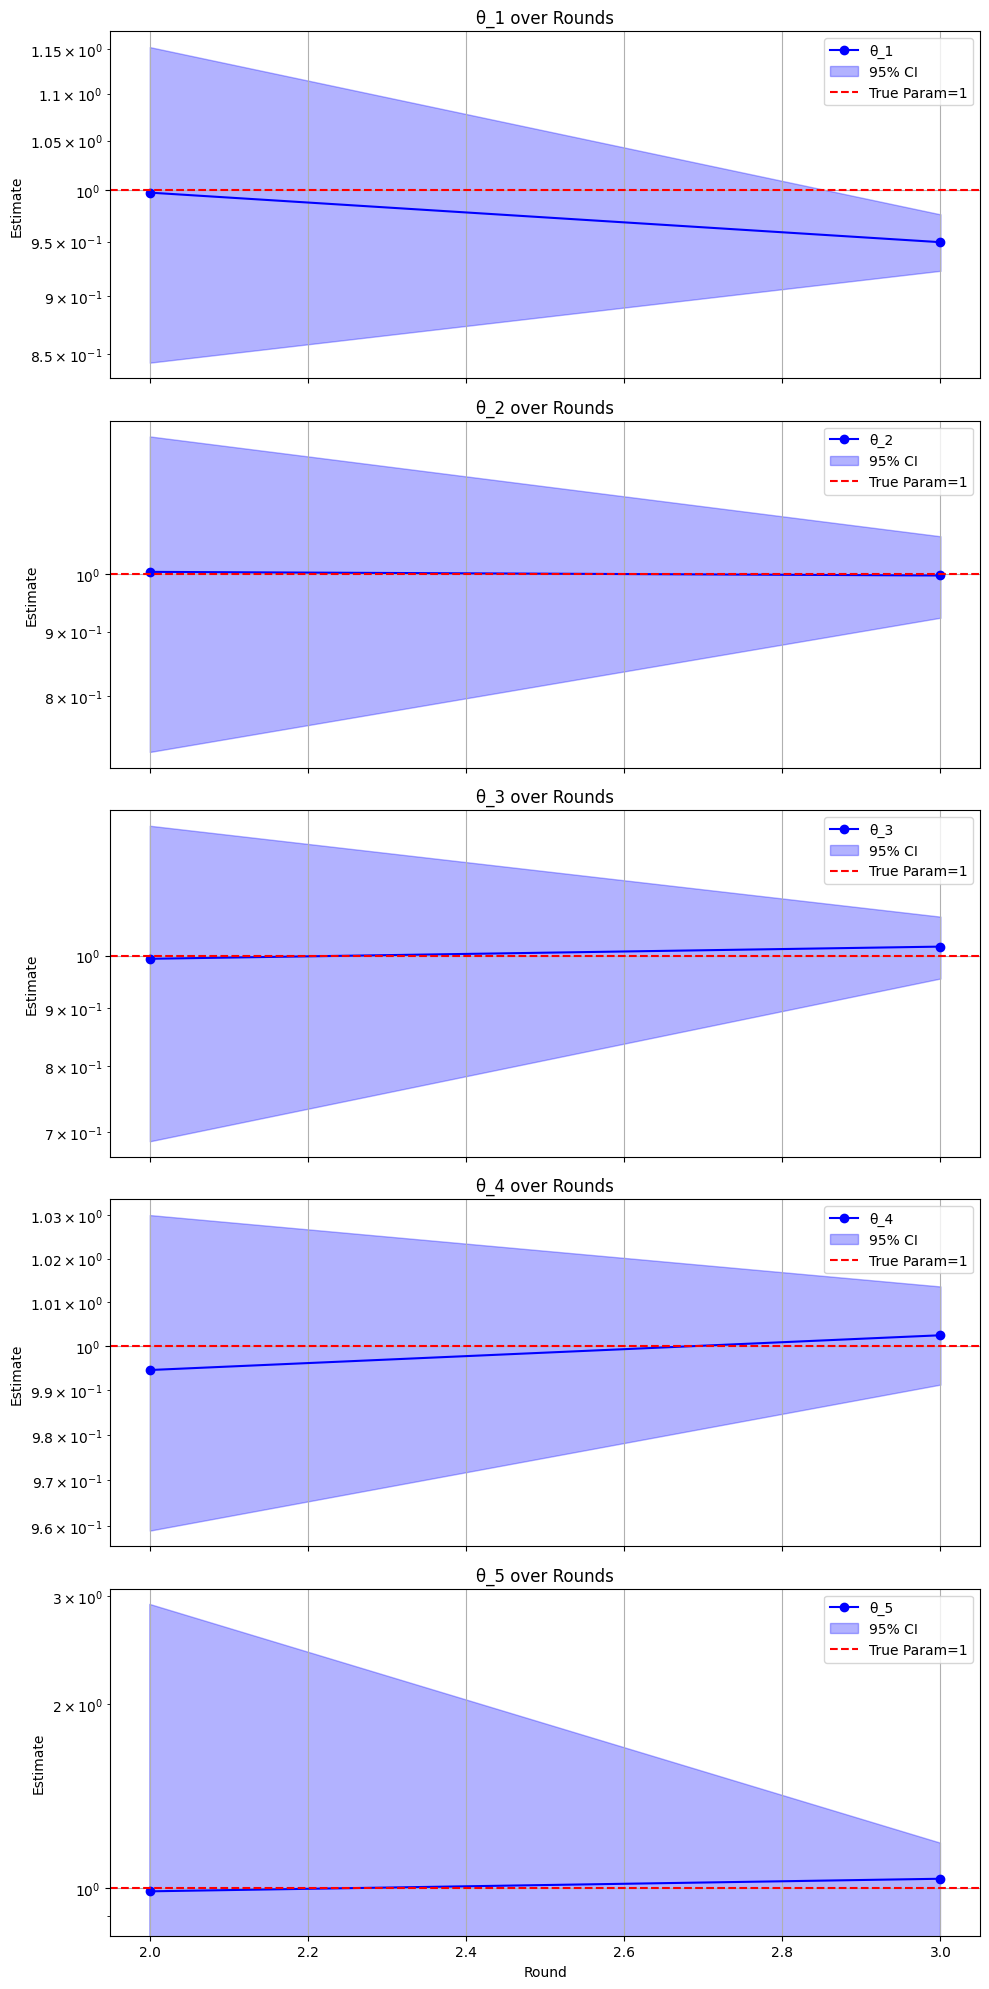

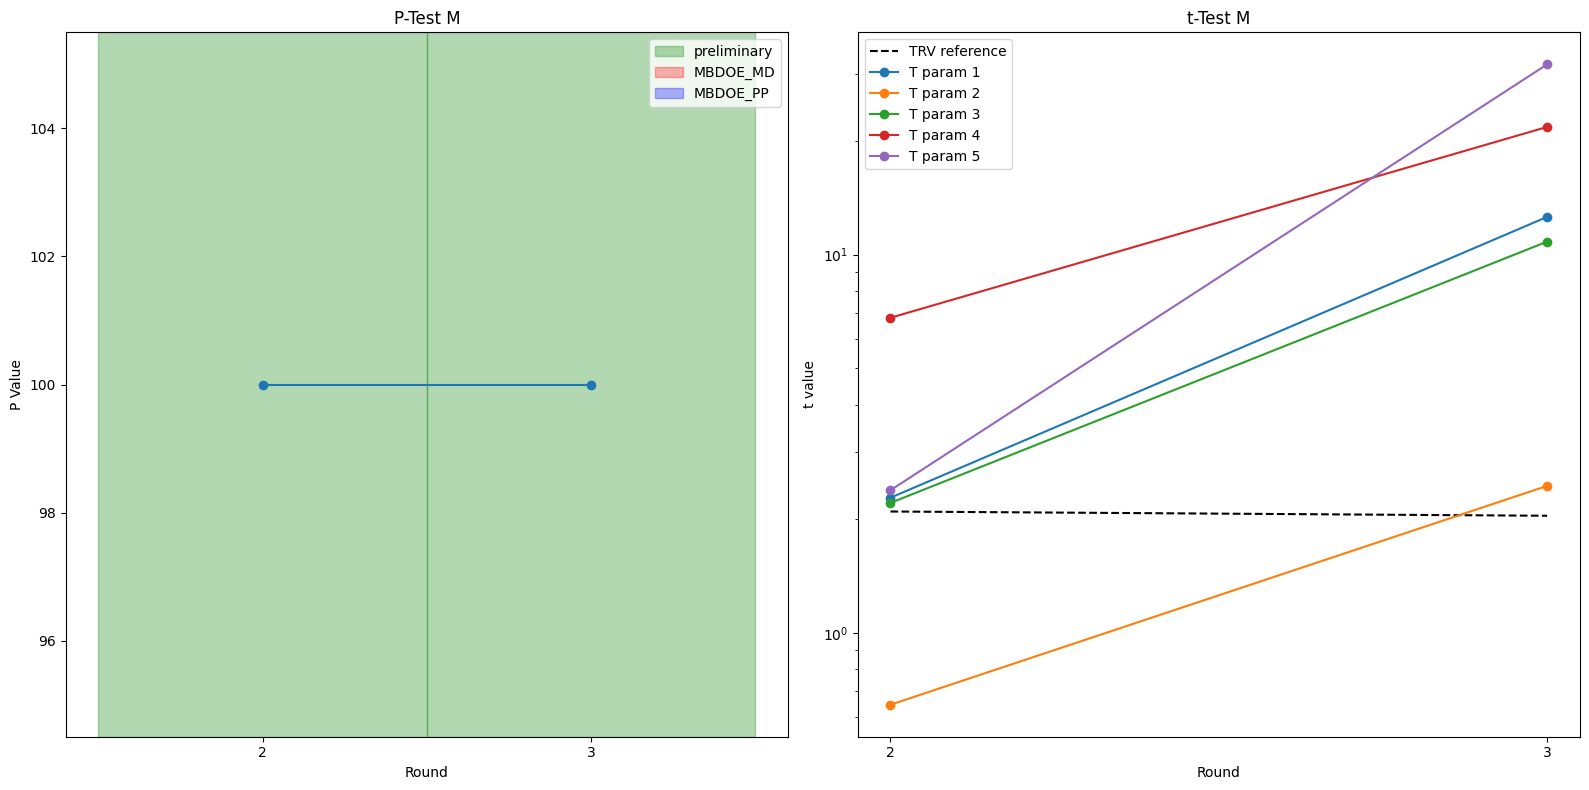

INFO:middoe.iden_utils:Reporter wrote data for Round 2 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\M_report_2.xlsx'.
INFO:middoe.iden_utils:Reporter wrote data for Round 3 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\M_report_3.xlsx'.
INFO:middoe.iden_utils:Summary written to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 2\post_processing\M_report_summary.txt'.


No rCC_values found for any round. Plotting is skipped.
Post-processing completed for: M


In [25]:

from middoe.log_utils import load_from_jac

results = load_from_jac()
iden = results['iden']

from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['M'],
    selected_rounds=[  2, 3],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)